In [2]:
#Populate Dictionary
pos_words = []
neg_words = []

f = open('C:\\Users\\Chandan\\Desktop\\DATA\\pos.txt',encoding="utf8")
f2 = open('C:\\Users\\Chandan\\Desktop\\DATA\\neg.txt',encoding="utf8")

line = f.readline()

while len(line)!=0:
    pos_words.append(line.rstrip('\n'))
    line = f.readline()

    
line2 = f2.readline()

while len(line2)!=0:
    neg_words.append(line2.rstrip('\n'))
    line2 = f2.readline()


In [3]:
import json
f = open('C:\\Users\\Chandan\\Desktop\\DATA\\tweets_#gopatriots.txt',encoding="utf8")

line = f.readline()



tweet_p_pdate = []
tweet_p_body = []
tweet = json.loads(line)
#print(tweet)
while len(line)!=0:
    tweet = json.loads(line)
    tweet_p_pdate.append(tweet['firstpost_date'])
    tweet_p_body.append(tweet['highlight'])
    line = f.readline()

In [4]:
import json
f = open('C:\\Users\\Chandan\\Desktop\\DATA\\tweets_#gohawks.txt',encoding="utf8")

line = f.readline()



tweet_h_pdate = []
tweet_h_body = []
tweet = json.loads(line)
#print(tweet)
while len(line)!=0:
    tweet = json.loads(line)
    tweet_h_pdate.append(tweet['firstpost_date'])
    tweet_h_body.append(tweet['highlight'])
    line = f.readline()

In [5]:
#j = 0;
#a = list(word in 'abrupt absence'.split() for word in neg_words)
#print(list(a))
#print(sum(a))

pos_score_p=[]
neg_score_p = []

start = 11897
end = 26000

for i in range(start,end):
    temp_neg = sum(list(word in tweet_p_body[i].split() for word in neg_words))
    temp_pos = sum(list(word in tweet_p_body[i].split() for word in pos_words))
    
    pos_score_p.append(temp_pos)
    neg_score_p.append(temp_neg)
    

In [6]:
score_class_p = []

for i in range(0,len(pos_score_p)):
    if(pos_score_p[i]>neg_score_p[i]):
        score_class_p.append(1)
    elif(pos_score_p[i]<neg_score_p[i]):
        score_class_p.append(-1)
    else:
        score_class_p.append(0)
        
        
        
        
        
    
    

In [7]:
import numpy as np

pos_cur = 0
neg_cur = 0
score_cur = 0;
pos_score_p_window = []
neg_score_p_window = []
score_class_p_window = []
window_p = 1
start_time_p = tweet_p_pdate[11897]
end_time_p = start_time_p + window_p*600

for i in range(0,len(score_class_p)-1):
    
    if tweet_p_pdate[i + 11897] < end_time_p:
#        pos_cur = pos_cur + pos_score_p[i]
#        neg_cur = neg_cur + neg_score_p[i]
        score_cur = score_cur+score_class_p[i]

    else:
#        pos_score_p_window.append(pos_cur)
#        pos_cur = pos_score_p[i]
        
#        neg_score_p_window.append(neg_cur)
#        neg_cur = neg_score_p[i]
         score_class_p_window.append(score_cur)
         score_cur = score_class_p[i]

        

         end_time_p = end_time_p + window_p*600
        
    
    

In [8]:
#print(neg_score_h_window)
pos_array = np.asarray(pos_score_p_window)
neg_array = np.asarray(neg_score_p_window)
score = np.subtract(pos_array, neg_array)
#print(score)

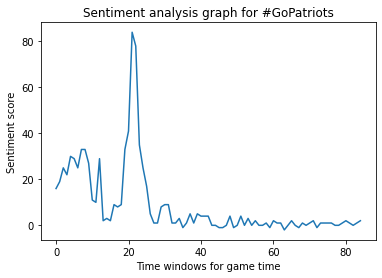

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Time windows for game time')
plt.ylabel('Sentiment score')
plt.title('Sentiment analysis graph for #GoPatriots')
plt.plot(score_class_p_window)
plt.show()

In [11]:
#load calculated positive and negative scores for go hawks

fp = open('C:\\Users\\Chandan\\Desktop\\DATA\\pscore_h.txt',encoding="utf8")
fn = open('C:\\Users\\Chandan\\Desktop\\DATA\\nscore_h.txt',encoding="utf8")
pscore_h = []
nscore_h = []
linep = fp.readline()

while (len(linep)!=0):
    pscore_h.append(int(linep.rstrip('\n')))
    linep = fp.readline()
    
linen = fn.readline()

#print(pscore_h)

while (len(linen)!=0):
    nscore_h.append(int(linen.rstrip('\n')))
    linen = fn.readline()
    

    
score_class_h = []

for i in range(0,len(pscore_h)):
    if(pscore_h[i]>nscore_h[i]):
        score_class_h.append(1)
    elif(pscore_h[i]<nscore_h[i]):
        score_class_h.append(-1)
    else:
        score_class_h.append(0)
    #print(score_class_h[i])    
        
        
print(score_class_h)        
fp.close()
fn.close()

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
import numpy as np

pos_cur = 0
neg_cur = 0
score_cur = 0;
score_class_h_window = []
window_h = 1
start_time_h = tweet_h_pdate[145339]
end_time_h = start_time_h + window_h*600
#print(score_class_h)

#score_class_h1 = score_class_h[145339:len(score_class_h)-5]   
for i in range(0,len(score_class_h)-1):
    if(i+145339>=180000):
        break
    if tweet_h_pdate[i + 145339] < end_time_h:
#        pos_cur = pos_cur + pos_score_p[i]
#        neg_cur = neg_cur + neg_score_p[i]
        score_cur = score_cur+score_class_h[i]

    else:
#        pos_score_p_window.append(pos_cur)
#        pos_cur = pos_score_p[i]
        
#        neg_score_p_window.append(neg_cur)
#        neg_cur = neg_score_p[i]
         score_class_h_window.append(score_cur)
         score_cur = score_class_h[i]

        

         end_time_h = end_time_h + window_h*600
        
    


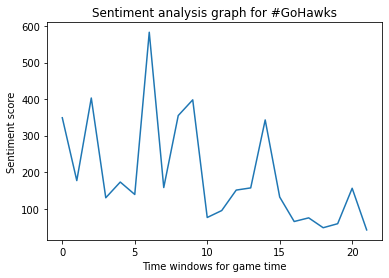

In [13]:
import matplotlib.pyplot as plt

plt.plot(score_class_h_window)
plt.xlabel('Time windows for game time')
plt.ylabel('Sentiment score')
plt.title('Sentiment analysis graph for #GoHawks')
plt.show()
